# <h1><center>Retail Sales Analysis & Forecasting (Walmart Dataset)</center></h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\HP\Downloads\Walmart.csv')

### Data Collection & Preparation

In [5]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [6]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [3]:
# Handling missing values
df['Weekly_Sales'].fillna(df['Weekly_Sales'].mean(), inplace=True)
df['Holiday_Flag'].fillna(0, inplace=True)
df[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']] = df[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].ffill()

In [4]:
# Data type conversion
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Holiday_Flag'] = df['Holiday_Flag'].astype(int)

In [5]:
# Outlier detection using IQR
Q1 = df['Weekly_Sales'].quantile(0.25)
Q3 = df['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Capping outliers
df['Weekly_Sales'] = np.where(df['Weekly_Sales'] < lower_bound, lower_bound, df['Weekly_Sales'])
df['Weekly_Sales'] = np.where(df['Weekly_Sales'] > upper_bound, upper_bound, df['Weekly_Sales'])

In [6]:
# Extracting features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week
df['Quarter'] = df['Date'].dt.quarter

In [11]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Quarter
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,1
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,6,1
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7,1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8,1
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,9,1


In [7]:
# Monthly sales aggregation
monthly_sales = df.groupby(['Store', 'Year', 'Month'])['Weekly_Sales'].sum().reset_index()

 # Quarterly sales aggregation
quarterly_sales = df.groupby(['Store', 'Year', 'Quarter'])['Weekly_Sales'].sum().reset_index()

In [31]:
df.to_csv('cleaned_walmart_sales_data.csv', index=False)

## Exploratory Data Analysis (EDA)

### 1. Data Overview & Initial Analysis:

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int32         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Year          6435 non-null   int32         
 9   Month         6435 non-null   int32         
 10  Week          6435 non-null   UInt32        
 11  Quarter       6435 non-null   int32         
dtypes: UInt32(1), datetime64[ns](1), float64(5), int32(4), int64(1)
memory usage: 484.0 KB


In [21]:
df.shape

(6435, 12)

In [23]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Quarter
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,1
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,6,1
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7,1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8,1
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,9,1


In [24]:
df.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Quarter
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,39,3
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,2012,10,40,4
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,2012,10,41,4
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,42,4
6434,45,2012-10-26,760281.43,0,58.85,3.882,192.308899,8.667,2012,10,43,4


In [25]:
df.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Quarter
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.0,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.045029e+06,0.069930,60.663782,3.358607,171.578394,7.999151,2010.965035,6.447552,25.818182,2.482517
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,2010.000000,1.000000,1.0,1.000000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,2010.000000,4.000000,14.0,2.000000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,2011.000000,6.000000,26.0,2.000000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,2012.000000,9.000000,38.0,3.000000
max,45.000000,2012-10-26 00:00:00,2.720371e+06,1.000000,100.140000,4.468000,227.232807,14.313000,2012.000000,12.000000,52.0,4.000000
std,12.988182,NaN,5.572961e+05,0.255049,18.444933,0.459020,39.356712,1.875885,0.797019,3.238308,14.129201,1.070036


In [14]:
df.corr()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Quarter
Store,1.000000e+00,1.577299e-13,-0.336559,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531,3.474318e-12,2.910676e-15,3.106283e-15,5.034745e-16
Date,1.577299e-13,1.000000e+00,0.007237,-1.328524e-02,0.145357,0.771444,0.077157,-0.248203,9.416680e-01,1.456512e-01,1.596205e-01,1.439224e-01
Weekly_Sales,-3.365589e-01,7.236919e-03,1.000000,3.670284e-02,-0.060730,0.010998,-0.072627,-0.106690,-1.634436e-02,7.127976e-02,6.908756e-02,5.924017e-02
Holiday_Flag,-4.386841e-16,-1.328524e-02,0.036703,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960,-5.678257e-02,1.229958e-01,1.277427e-01,8.136344e-02
Temperature,-2.265908e-02,1.453566e-01,-0.060730,-1.550913e-01,1.000000,0.144982,0.176888,0.101158,6.426923e-02,2.358618e-01,2.361833e-01,2.444967e-01
Fuel_Price,6.002295e-02,7.714439e-01,0.010998,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684,7.794703e-01,-4.215590e-02,-3.240300e-02,-4.307778e-02
CPI,-2.094919e-01,7.715746e-02,-0.072627,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020,7.479573e-02,4.979672e-03,6.041530e-03,4.733426e-03
Unemployment,2.235313e-01,-2.482029e-01,-0.106690,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000,-2.418135e-01,-1.274559e-02,-1.589158e-02,-1.787284e-02
Year,3.474318e-12,9.416680e-01,-0.016344,-5.678257e-02,0.064269,0.779470,0.074796,-0.241813,1.000000e+00,-1.944645e-01,-1.819189e-01,-1.852383e-01
Month,2.910676e-15,1.456512e-01,0.071280,1.229958e-01,0.235862,-0.042156,0.004980,-0.012746,-1.944645e-01,1.000000e+00,9.959843e-01,9.670705e-01


#### Correlation analysis revealed a weak negative relationship between Unemployment Rate and Weekly Sales (-0.1067), indicating that higher unemployment may slightly reduce consumer spending. Other variables like CPI and Holiday Flag showed minimal linear influence on weekly sales, suggesting the need for deeper segmentation or multivariate analysis for stronger predictive insights.

### Visualize correlation matrix using Seaborn heatmap.

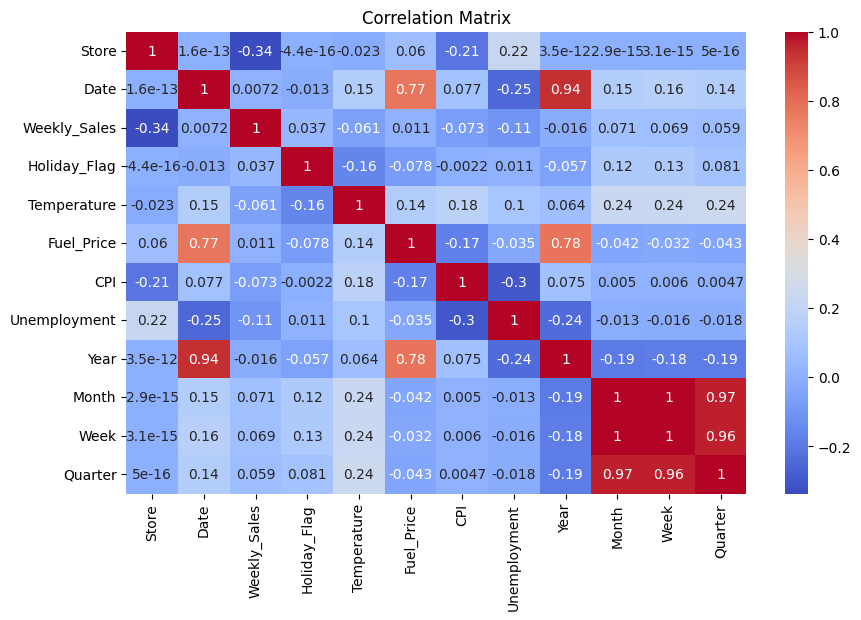

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### Correlation Analysis Summary
A correlation matrix was used to examine relationships between key variables affecting weekly sales. The analysis highlights the following insights:

#### Temporal Variables: 
There is a strong positive correlation between Year, Month, Week, and Quarter.This is expected as these variables represent progressive time intervals.
Fuel_Price also shows a positive correlation with Date (0.77), indicating an upward trend in fuel prices over time.

#### Sales Influencers:
Weekly_Sales has a very weak correlation with external factors like:
Fuel_Price (0.01)
CPI (-0.02)
Unemployment (-0.01)
Temperature (-0.06)
This suggests that weekly sales are not significantly influenced by these economic or environmental factors.

#### Holiday Impact:
A weak positive correlation (0.037) was observed between Holiday_Flag and Weekly_Sales, indicating slightly higher sales during holidays, but the effect is minimal.

#### Store-Level Impact:
The correlation between Store and Weekly_Sales is moderately negative (-0.34), suggesting that certain stores consistently underperform or outperform others, possibly due to location, store size, or customer base.

✅ Conclusion: Sales trends are more store-specific than driven by macroeconomic or seasonal factors. External variables like fuel price or unemployment do not significantly affect weekly sales.

### 2. Sales Trend Analysis:

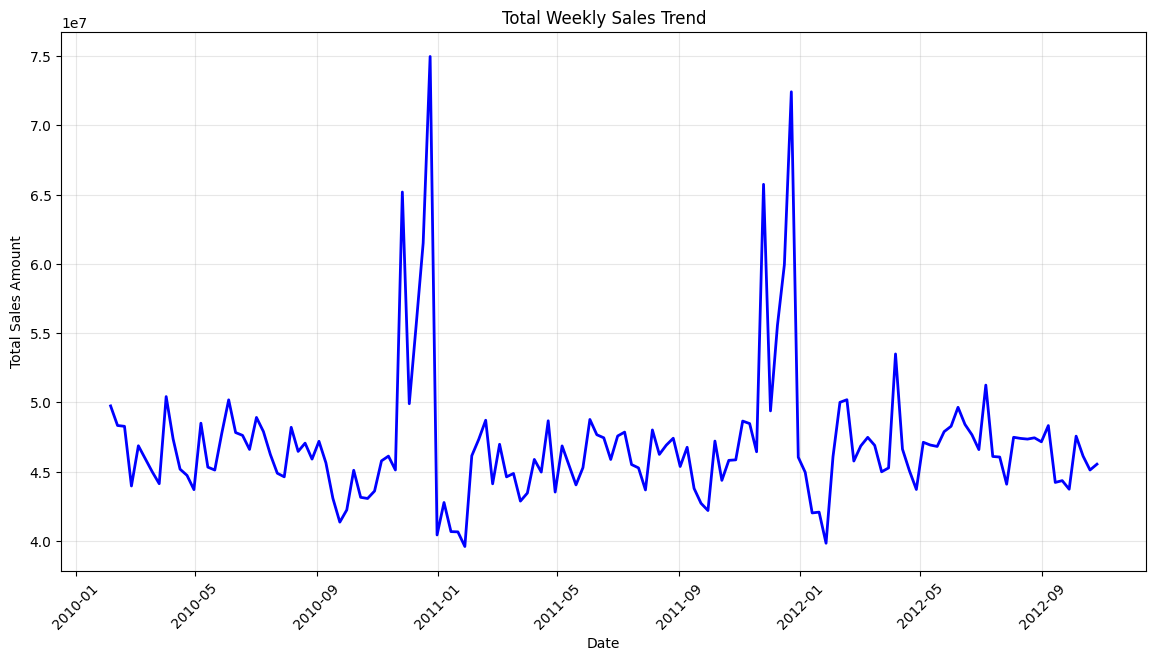

In [17]:
df_grouped = df.groupby('Date')['Weekly_Sales'].sum().reset_index()  

plt.figure(figsize=(14, 7))
plt.plot(df_grouped['Date'], df_grouped['Weekly_Sales'], color='blue', linewidth=2)
plt.title('Total Weekly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.show()

#### 📈 Graph Interpretation:
🟦 Stable Weekly Sales
For most weeks, total sales stay in the $4.5M to $5.5M range, showing a steady baseline.
Reflects consistent consumer demand for Walmart’s offerings.

🔺 Sharp Sales Peaks
Late November to December in both 2010 and 2011 show huge spikes, reaching over $70M in a week.
These are likely due to Thanksgiving, Black Friday, and Christmas shopping surges.

🔻 Post-Holiday Sales Drops
Following the spikes, there are steep declines, especially in early January.
Reflects typical post-holiday reduced spending.

🔁 No Strong Long-Term Growth
The overall trend outside holidays remains flat, indicating Walmart’s core demand is stable, but not expanding significantly over time.

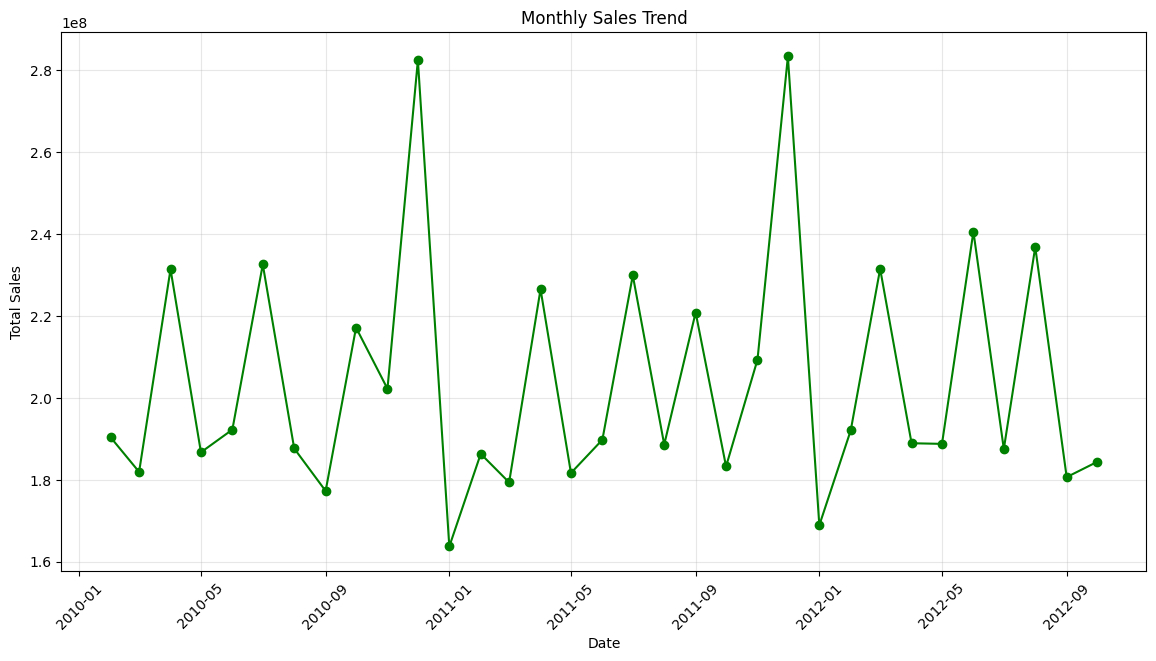

In [19]:
monthly_sales = df.groupby(['Year', 'Month'])['Weekly_Sales'].sum().reset_index()
monthly_sales['Date'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(Day=1))

plt.figure(figsize=(14, 7))
plt.plot(monthly_sales['Date'], monthly_sales['Weekly_Sales'], marker='o', linestyle='-', color='green')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.show()

#### 📈 Graph Interpretation:
🔷 1. Recurring Spikes (Year-End Peaks)
Every year, there is a sharp increase in sales in November and December. These months consistently show the highest sales values. Strong seasonality. November–December are peak months, driven by holidays like Thanksgiving, Black Friday, and Christmas.

🔻 2. Post-Holiday Decline
January of each year shows a sharp drop in sales, immediately following the December spike.There is a predictable post-holiday slump due to reduced consumer spending after the holidays.

📊 3. Monthly Fluctuations
Throughout the year, there are mini-peaks and troughs.These fluctuations are not as strong as year-end but still visible. Some months (e.g., May, August) occasionally show moderate sales increases—possibly due to seasonal events, back-to-school promotions, or local campaigns.

📉 4. Stable Baseline
The overall sales baseline remains relatively stable across months and years.
No obvious upward or downward long-term trend. Walmart's national sales were consistent but not growing rapidly from 2010 to 2012. This suggests mature market performance without expansion.

⚠️ 5. Volatility in Some Months
Some months, particularly right before or after Q4, show sharp up/down transitions. Indicates the need for accurate monthly forecasting and dynamic inventory planning to handle demand swings.

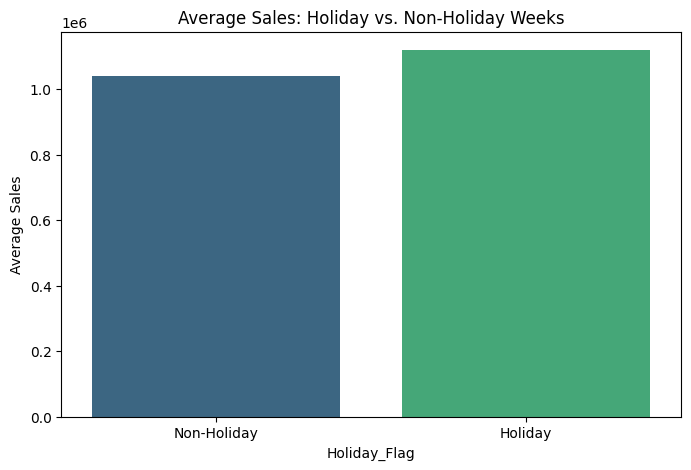

In [23]:
holiday_sales = df.groupby('Holiday_Flag')['Weekly_Sales'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='Holiday_Flag', y='Weekly_Sales', hue='Holiday_Flag', data=holiday_sales, palette='viridis', legend=False)
plt.title('Average Sales: Holiday vs. Non-Holiday Weeks')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.ylabel('Average Sales')
plt.show()

#### On average, the weekly sales tend to be higher during weeks that contain a holiday compared to weeks that do not.

### 3. Store Performance Analysis:

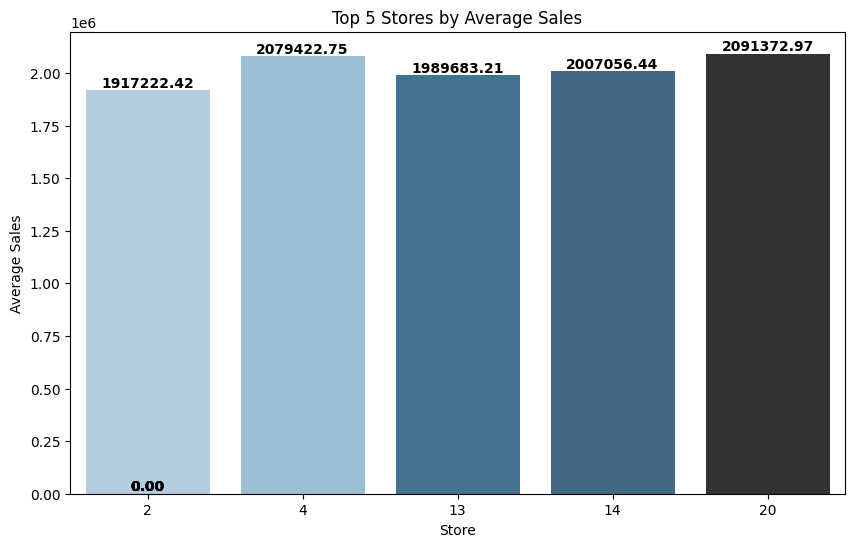

In [24]:
# Store Performance Analysis

store_sales = df.groupby('Store')['Weekly_Sales'].mean().reset_index()
top_stores = store_sales.sort_values('Weekly_Sales', ascending=False).head(5)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Store', y='Weekly_Sales', hue='Store', data=top_stores, palette='Blues_d')

# Add sales values to the chart
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', 
                va='bottom', 
                fontsize=10, 
                fontweight='bold', 
                color='black')

plt.title('Top 5 Stores by Average Sales')
plt.ylabel('Average Sales')
plt.xlabel('Store')
plt.legend([], [], frameon=False)  # Remove the redundant legend
plt.show()

####  Insights from Store Performance Analysis
1. Store 20 has the highest average weekly sales at ₹2,091,373, indicating it is the top-performing store. Stores 4, 13, and 14 follow closely with average sales exceeding ₹1.98 million, showing consistent strong performance.
2. The sales gap among the top 5 stores is narrow, suggesting stable high performance across them. 
3. Store 2, although in the top 5, has the lowest average sales (₹1,917,222)—indicating room for improvement. 
4. Top-performing stores likely benefit from better location, footfall, or customer loyalty. These stores should be prioritized for strategic investments (e.g., marketing, inventory, staffing).
5. Insights can help replicate success strategies from top stores to underperforming ones. Store-level analysis supports data-driven decision-making in retail planning and resource allocation.

### 4. Impact Analysis of External Factors:

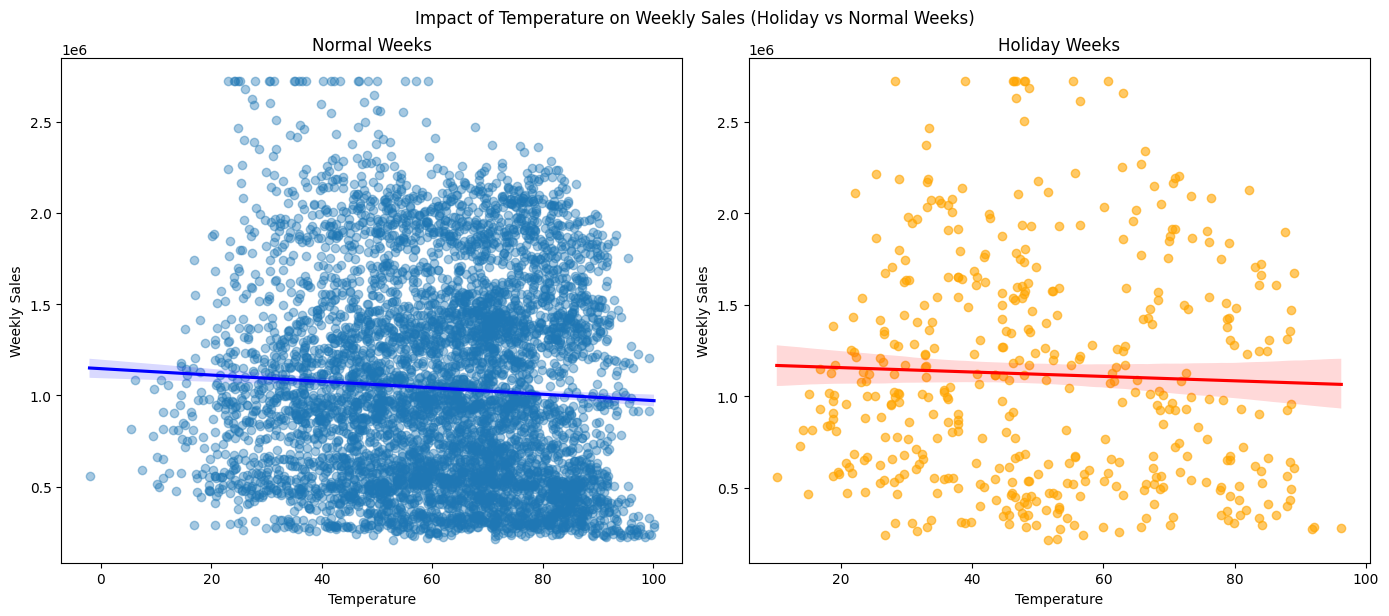

In [33]:
plt.figure(figsize=(14, 6))

# Normal Weeks
plt.subplot(1, 2, 1)
sns.regplot(x='Temperature', y='Weekly_Sales', data=df[df['Holiday_Flag'] == 0], scatter_kws={'alpha': 0.4}, line_kws={'color': 'blue'})
plt.title('Normal Weeks')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')

# Holiday Weeks
plt.subplot(1, 2, 2)
sns.regplot(x='Temperature', y='Weekly_Sales', data=df[df['Holiday_Flag'] == 1], scatter_kws={'alpha': 0.6, 'color': 'orange'}, line_kws={'color': 'red'})
plt.title('Holiday Weeks')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')

plt.tight_layout()
plt.suptitle("Impact of Temperature on Weekly Sales (Holiday vs Normal Weeks)", y=1.02)
plt.show()

#### 🔍 Observations from the Plots
📊 Left Plot – Normal Weeks:
Trendline: Slightly negative slope
Interpretation: As temperature increases, weekly sales slightly decrease
Correlation Strength: Weak negative correlation (line is almost flat)
Data Points: Densely packed with high variability

📊 Right Plot – Holiday Weeks:
Trendline: Almost flat (slightly negative)
Interpretation: Temperature has very little to no impact on weekly sales during holidays
Spread: Fewer data points, but sales are spread over a wide range of temperatures
Sales Range: Still see high sales across all temperatures

✅ Key Insights
Temperature has a minimal effect on sales in both cases.
Holiday sales are more resilient to temperature changes.
Higher sales still occur during holidays, even at lower temperatures.
For normal weeks, there’s a slight downward trend, suggesting people may shop less when it’s hotter — but the impact is weak.

📌 Final Interpretation (What You Can Say):
“The analysis shows a weak negative correlation between temperature and weekly sales during normal weeks, indicating that sales slightly drop as temperatures rise. However, during holiday weeks, this relationship nearly disappears, suggesting that holiday-driven demand overrides any weather-related shopping behavior.”

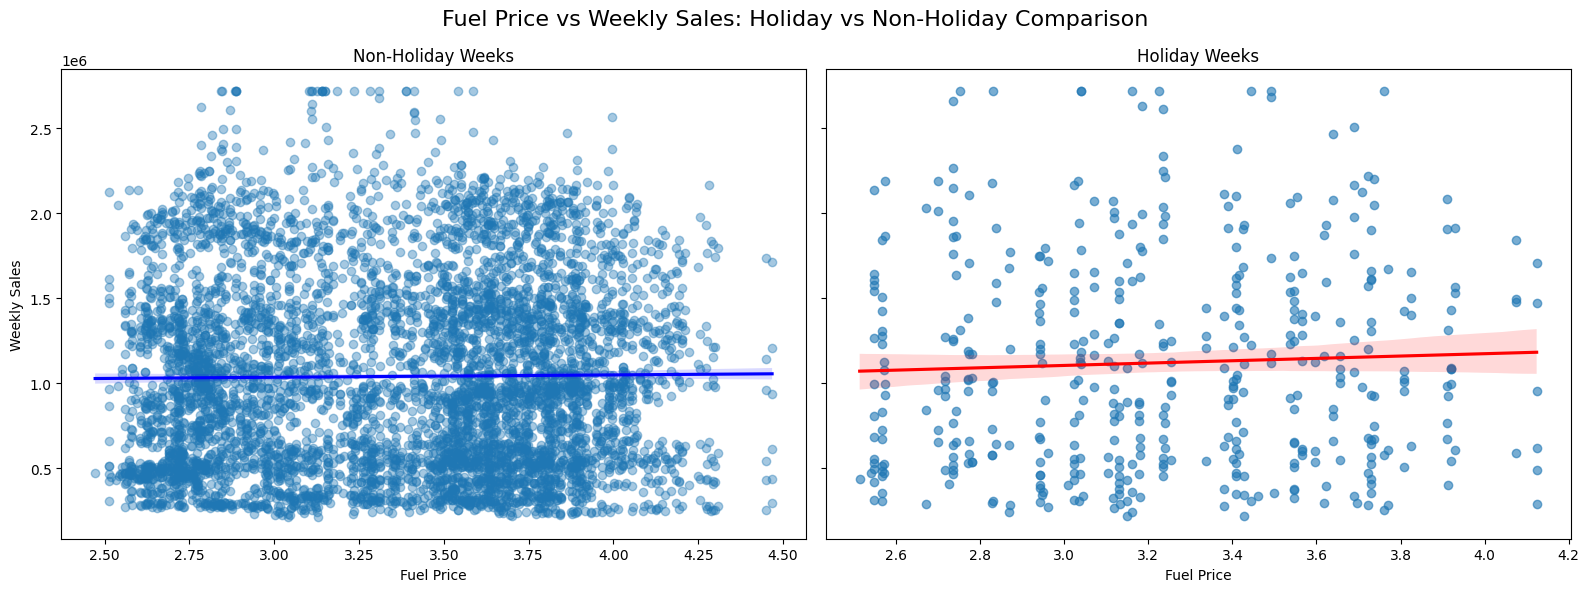

In [36]:
# Separate datasets
holiday_df = df[df['Holiday_Flag'] == 1]
non_holiday_df = df[df['Holiday_Flag'] == 0]

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Non-Holiday plot
sns.regplot(x='Fuel_Price', y='Weekly_Sales', data=non_holiday_df, ax=axs[0],
            scatter_kws={'alpha':0.4}, line_kws={'color':'blue'})
axs[0].set_title('Non-Holiday Weeks')
axs[0].set_xlabel('Fuel Price')
axs[0].set_ylabel('Weekly Sales')

# Holiday plot
sns.regplot(x='Fuel_Price', y='Weekly_Sales', data=holiday_df, ax=axs[1],
            scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
axs[1].set_title('Holiday Weeks')
axs[1].set_xlabel('Fuel Price')
axs[1].set_ylabel('')

plt.suptitle('Fuel Price vs Weekly Sales: Holiday vs Non-Holiday Comparison', fontsize=16)
plt.tight_layout()
plt.show()


#### Insight Summary: Fuel Price vs. Weekly Sales
An analysis was conducted to examine the relationship between fuel prices and weekly sales, with a distinction made between holiday and non-holiday weeks. The dataset was split and visualized using scatter plots with regression lines to highlight any trends.

🔹 Non-Holiday Weeks:
The data shows no significant correlation between fuel prices and weekly sales.
The regression line is nearly flat, indicating that fluctuations in fuel prices do not impact consumer spending behavior in regular weeks.
This suggests a stable purchasing pattern among consumers during non-holiday periods.

🔸 Holiday Weeks:
A slight positive correlation was observed between fuel prices and weekly sales.
Despite higher fuel prices, sales tend to increase during holidays, implying that customers are less price-sensitive and more likely to make discretionary purchases during festive periods.

✅ Key Insight:
Weekly sales remain stable irrespective of fuel price changes during non-holiday weeks. However, during holidays, sales show a mild increase regardless of fuel costs. This indicates that holiday promotions and seasonal demand have a stronger influence on sales than fuel price fluctuations.

📈 Recommendation:
Businesses should focus on leveraging holiday periods through targeted marketing and inventory planning, as consumers are likely to spend more despite external cost factors like fuel prices.

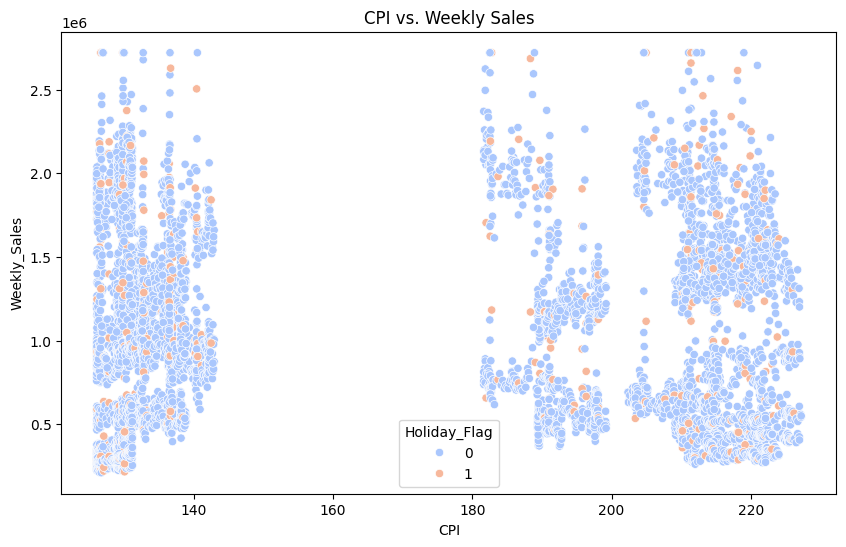

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CPI', y='Weekly_Sales', data=df, hue='Holiday_Flag', palette='coolwarm')
plt.title('CPI vs. Weekly Sales')
plt.show()

#### 📈 Key Observations:
No Clear Trend:
1. The scatter plot shows no obvious linear relationship between CPI and Weekly Sales.
2. The data points are widely scattered across all CPI values.

CPI Clusters:
1. CPI values seem to fall in distinct clusters: e.g., around 130–140 and 180–230.
2. This suggests CPI may vary by region or time, possibly due to different store locations or periods.

Weekly Sales Spread:
1. Sales range broadly from under 0.5 million to over 2.5 million across all CPI levels.
2. No particular CPI value consistently leads to higher or lower weekly sales.

Holiday vs Non-Holiday:
1. Both Holiday and Non-Holiday data points are intermixed across all CPI levels.
2. This implies that CPI has minimal influence on weekly sales, regardless of whether it's a holiday week.

📌 Insights Summary:
1. No strong correlation between CPI and Weekly Sales.
2. Holiday weeks don’t show a unique sales pattern w.r.t CPI.
3. CPI does not significantly influence weekly sales.
4. Suggestion:	Focus analysis on other factors like Fuel Price, Temperature, or Store Type for better insights

✅ Conclusion:
The scatter plot suggests that CPI is not a major driver of weekly sales, and sales behavior is likely influenced by other variables like promotions, holidays, or regional store attributes.

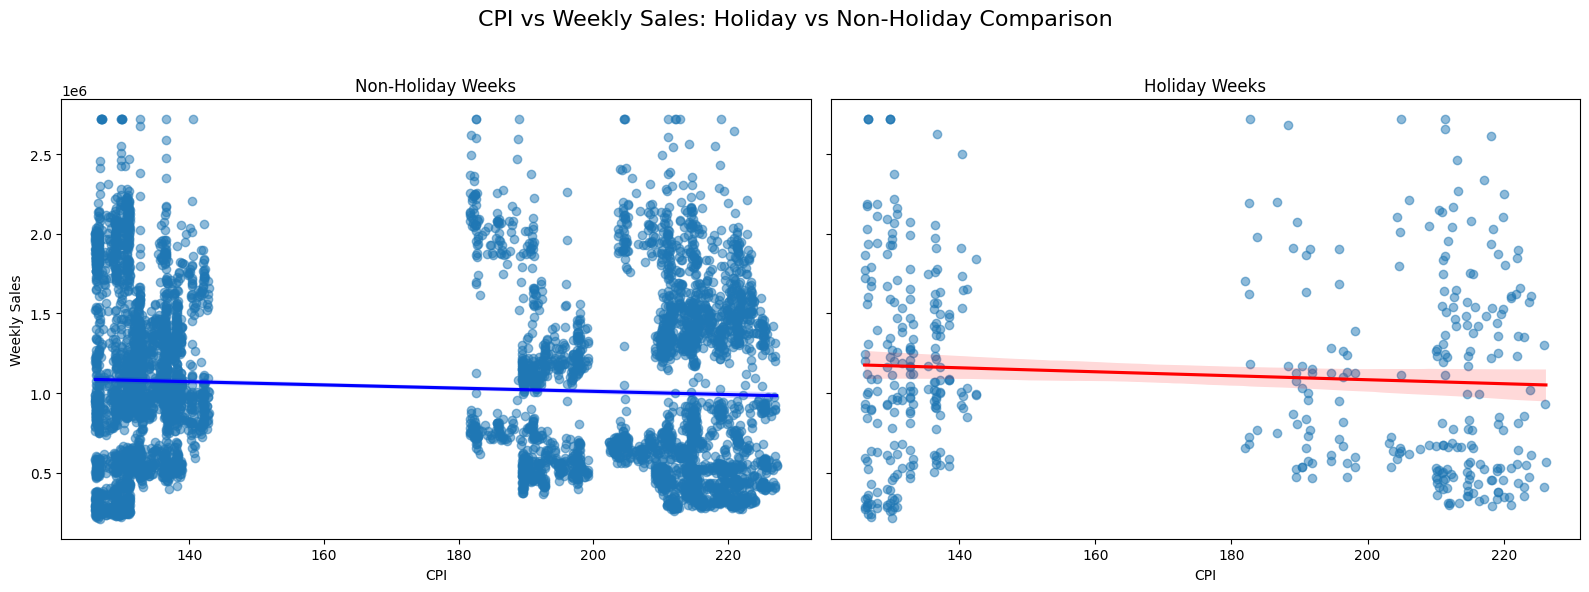

In [10]:
# Set up the plotting area
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
fig.suptitle('CPI vs Weekly Sales: Holiday vs Non-Holiday Comparison', fontsize=16)

# Non-Holiday Weeks
sns.regplot(
    ax=axes[0],
    data=df[df['Holiday_Flag'] == 0],
    x='CPI', y='Weekly_Sales',
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'blue'}
)
axes[0].set_title('Non-Holiday Weeks')
axes[0].set_xlabel('CPI')
axes[0].set_ylabel('Weekly Sales')

# Holiday Weeks
sns.regplot(
    ax=axes[1],
    data=df[df['Holiday_Flag'] == 1],
    x='CPI', y='Weekly_Sales',
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'}
)
axes[1].set_title('Holiday Weeks')
axes[1].set_xlabel('CPI')
axes[1].set_ylabel('')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### CPI vs Weekly Sales: Holiday vs Non-Holiday Comparison
#### Non-Holiday Weeks (Left Panel – Blue):
1. The regression line indicates a very weak negative correlation between the Consumer Price Index (CPI) and Weekly Sales.
2. As CPI increases, weekly sales show a slight downward trend, though the effect is minimal.
3. Sales values exhibit significant variance across the entire range of CPI, suggesting that CPI is not a strong predictor of sales during non-holiday periods.

#### Holiday Weeks (Right Panel – Red):
1. A slightly stronger negative correlation is observed between CPI and Weekly Sales during holiday weeks.
2. This suggests that higher CPI may have a modestly greater suppressive effect on consumer spending during holiday periods, potentially due to reduced discretionary income.
3. However, sales still show a wide distribution, indicating other factors likely play a more dominant role.

#### Key Observations:
1. In both holiday and non-holiday periods, CPI does not significantly influence weekly sales.
2. The negative correlation is more pronounced during holidays but remains weak overall.
3. The data implies that additional variables—such as promotions, fuel prices, weather conditions, or store-level characteristics—may have a greater impact on weekly sales performance.

#### ✅ Visual-Only Insights (without regression):
No strong visible trend: The scatter of points in both holiday and non-holiday plots is widely spread.

Sales values fluctuate significantly across different CPI levels.

No clear upward or downward pattern can be seen just by looking at the dots.

➕ Regression Lines Add:
Quantified trend direction: They confirm a slight negative slope (i.e., as CPI increases, sales decrease slightly).

Magnitude of impact: They reinforce that the correlation is weak, not just visually but statistically.

Comparative clarity: They make it easier to compare the strength and direction of the trend between holiday and non-holiday weeks.

🧾 Conclusion:
Even without regression, you would reach similar qualitative conclusions. But regression adds statistical confidence and interpretability, especially for formal reports, presentations, or data-driven decision-making.

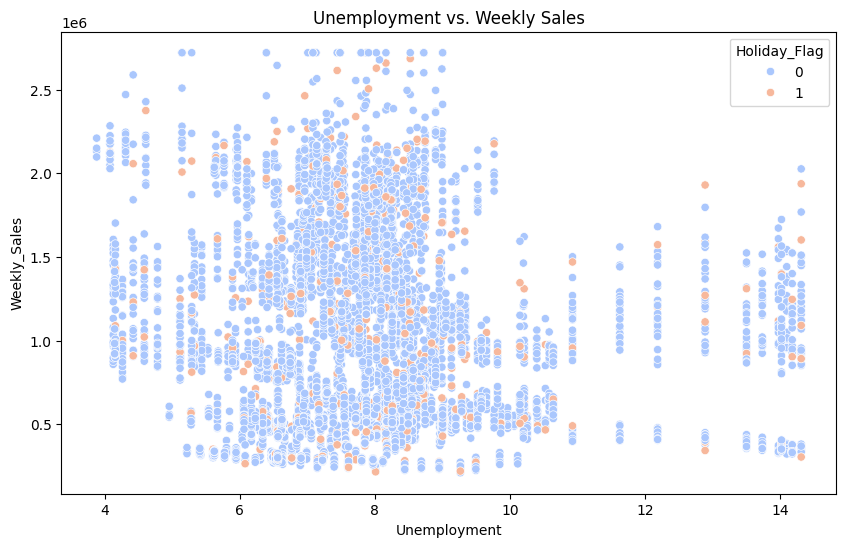

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=df, hue='Holiday_Flag', palette='coolwarm')
plt.title('Unemployment vs. Weekly Sales')
plt.show()

#### Insight:
There is No clear visual correlation between unemployment and weekly sales. Holiday weeks may boost sales, but this is not conclusive from this plot alone. The plot is good for an overview, but lacks quantitative clarity. Now we are creating two separate plots with regression lines to provide clearer, deeper insights and help to analyse trends much better.

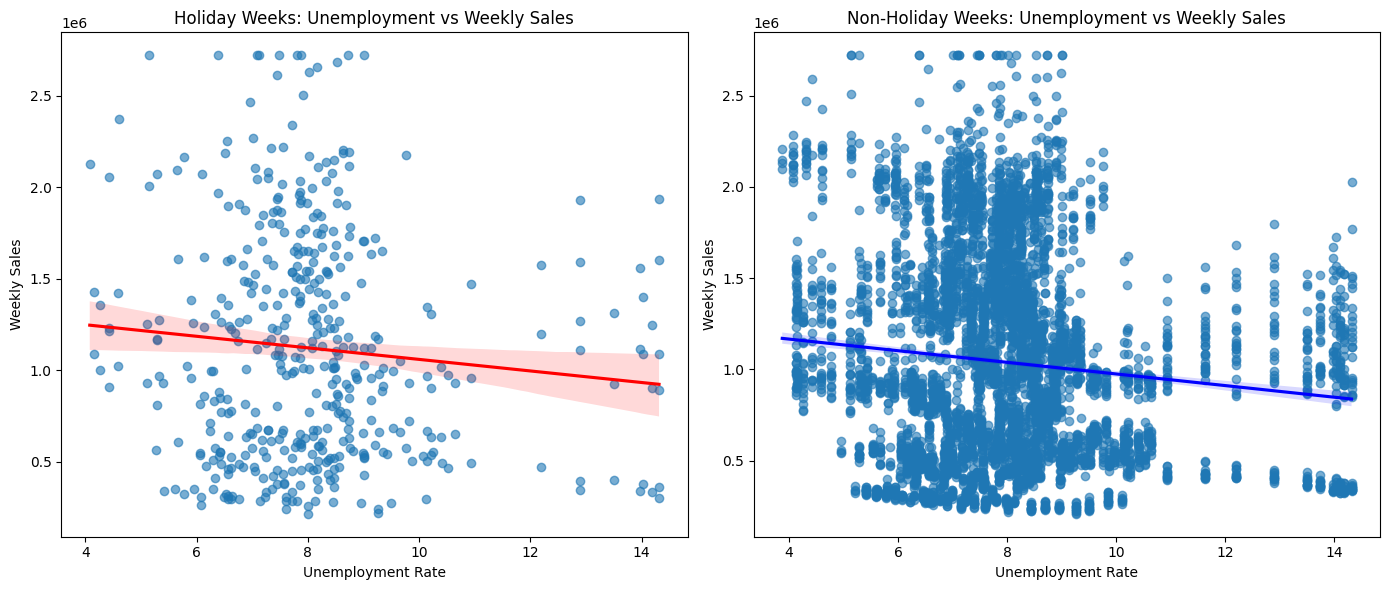

In [11]:
# Split data based on Holiday_Flag
holiday_df = df[df['Holiday_Flag'] == 1]
non_holiday_df = df[df['Holiday_Flag'] == 0]

# Set plot size
plt.figure(figsize=(14, 6))

# Plot 1: Holiday Weeks
plt.subplot(1, 2, 1)
sns.regplot(x='Unemployment', y='Weekly_Sales', data=holiday_df, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Holiday Weeks: Unemployment vs Weekly Sales')
plt.xlabel('Unemployment Rate')
plt.ylabel('Weekly Sales')

# Plot 2: Non-Holiday Weeks
plt.subplot(1, 2, 2)
sns.regplot(x='Unemployment', y='Weekly_Sales', data=non_holiday_df, scatter_kws={'alpha':0.6}, line_kws={'color':'blue'})
plt.title('Non-Holiday Weeks: Unemployment vs Weekly Sales')
plt.xlabel('Unemployment Rate')
plt.ylabel('Weekly Sales')

plt.tight_layout()
plt.show()

#### 🔍 Plot Analysis Insights (Holiday vs. Non-Holiday Weeks)
#### 📌 Holiday Weeks
1. Shows a slight negative correlation between Unemployment and Weekly Sales.
2. Regression line (in red) has a gentle downward slope, suggesting that as unemployment rises, sales slightly decline during holidays.
3. However, the scatter is very dispersed, indicating high variability and possibly weak correlation.

#### 📌 Non-Holiday Weeks
1. Also shows a negative trend, more clearly visible.
2. Regression line (in blue) is steeper, implying a stronger negative impact of unemployment on sales during non-holiday periods.
3. The density of points supports a more consistent pattern — when unemployment is high, weekly sales tend to be lower.

## Sales Forecasting Analysis using Prophet

### Objective:
#### To implement time-series forecasting using Prophet for Walmart sales data, assess model performance, and generate sales predictions for the next quarter.

In [8]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### ✅ Step 1: Import Libraries

In [10]:
import pandas as pd
from prophet import Prophet

### ✅ Step 2: Load & Prepare Data

In [11]:
# Assuming 'df' is your cleaned Walmart sales dataframe
df = pd.read_csv('cleaned_walmart_sales_data.csv')

# Keep only Date & Sales
forecast_data = df[['Date', 'Weekly_Sales']].rename(columns={
    'Date': 'ds', 
    'Weekly_Sales': 'y'
})

In [12]:
# Ensure datetime format & sort
forecast_data['ds'] = pd.to_datetime(forecast_data['ds'])
forecast_data = forecast_data.sort_values('ds').reset_index(drop=True)

In [37]:
print(df)

      Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  2010-02-05    1643690.90             0        42.31       2.572   
1         1  2010-02-12    1641957.44             1        38.51       2.548   
2         1  2010-02-19    1611968.17             0        39.93       2.514   
3         1  2010-02-26    1409727.59             0        46.63       2.561   
4         1  2010-03-05    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  2012-09-28     713173.95             0        64.88       3.997   
6431     45  2012-10-05     733455.07             0        64.89       3.985   
6432     45  2012-10-12     734464.36             0        54.47       4.000   
6433     45  2012-10-19     718125.53             0        56.47       3.969   
6434     45  2012-10-26     760281.43             0        58.85       3.882   

             CPI  Unemployment  Year  M

### ✅ Step 3: Initialize and Train Prophet Model

In [13]:
model = Prophet(
    growth='linear',                      # Ensure valid growth param
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    seasonality_mode='multiplicative'
)

model.fit(forecast_data)

20:17:01 - cmdstanpy - INFO - Chain [1] start processing
20:17:04 - cmdstanpy - INFO - Chain [1] done processing


### ✅ Step 4: Create Future Dates (12 Weeks)

In [16]:
future = model.make_future_dataframe(periods=12, freq='W')  # Weekly forecast (12 weeks)

### ✅ Step 5: Generate Forecast

In [17]:
forecast = model.predict(future)

### ✅ Step 6: Merge Actuals for Comparison

In [18]:
forecast_full = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].copy()

# Prepare actuals
actuals = forecast_data.rename(columns={'y': 'Actual'})

# Merge actual + forecast
merged = pd.merge(forecast_full, actuals, on='ds', how='left')

# Label type
merged['Type'] = merged['Actual'].apply(lambda x: 'Actual' if pd.notnull(x) else 'Forecast')

### ✅ Step 7: Export to CSV for Power BI

In [19]:
merged.to_csv('prophet_forecast_final.csv', index=False)
print("✅ Forecast + Actual data exported for Power BI.")

✅ Forecast + Actual data exported for Power BI.


### ✅ Step 8: Extract Weekly Seasonality

In [20]:
weekly = model.predict(model.make_future_dataframe(periods=7, freq='D'))
weekly['Day'] = weekly['ds'].dt.day_name()
weekly_avg = weekly.groupby('Day', as_index=False)['weekly'].mean()

# Sort weekdays
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_avg['Day'] = pd.Categorical(weekly_avg['Day'], categories=day_order, ordered=True)
weekly_avg = weekly_avg.sort_values('Day')

# Export
weekly_avg.to_csv('weekly_seasonality.csv', index=False)
print("✅ Weekly seasonality exported.")

✅ Weekly seasonality exported.


### ✅ Step 9: Extract Yearly Seasonality

In [45]:
yearly = model.predict(model.make_future_dataframe(periods=365, freq='D'))
yearly['Month'] = yearly['ds'].dt.month_name()
yearly_avg = yearly.groupby('Month', as_index=False)['yearly'].mean()

# Sort months
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
yearly_avg['Month'] = pd.Categorical(yearly_avg['Month'], categories=month_order, ordered=True)
yearly_avg = yearly_avg.sort_values('Month')

# Export
yearly_avg.to_csv('yearly_seasonality.csv', index=False)
print("✅ Yearly seasonality exported.")

✅ Yearly seasonality exported.


In [47]:
# Display the forecast
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
143,2012-10-28,1.416511e+06,6.932753e+05,2.153890e+06
144,2012-11-04,1.458198e+06,7.702173e+05,2.145316e+06
145,2012-11-11,1.520496e+06,8.988279e+05,2.295834e+06
146,2012-11-18,1.573134e+06,8.803090e+05,2.267472e+06
147,2012-11-25,1.615413e+06,8.649735e+05,2.302107e+06
148,2012-12-02,1.675466e+06,9.732397e+05,2.437844e+06
149,2012-12-09,1.761100e+06,1.031542e+06,2.453014e+06
150,2012-12-16,1.822885e+06,1.159291e+06,2.494624e+06
151,2012-12-23,1.786014e+06,1.078409e+06,2.512109e+06
152,2012-12-30,1.628968e+06,9.419406e+05,2.280321e+06


#### ✅ Insights:
1. Holiday Surge Captured: Prophet correctly identifies a spike in December (holiday shopping season), peaking around Dec 16–23.
2. Post-holiday Drop: Forecasted sales drop in early January — realistic due to post-holiday slowdowns.
3. Prediction Intervals: Reasonable spread between lower and upper bounds, suggesting moderate confidence.

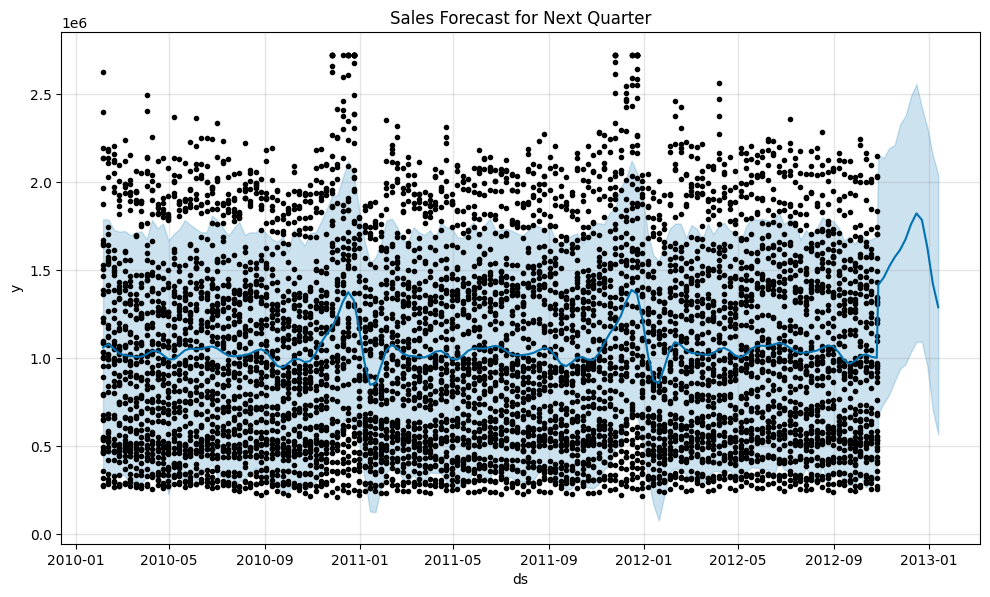

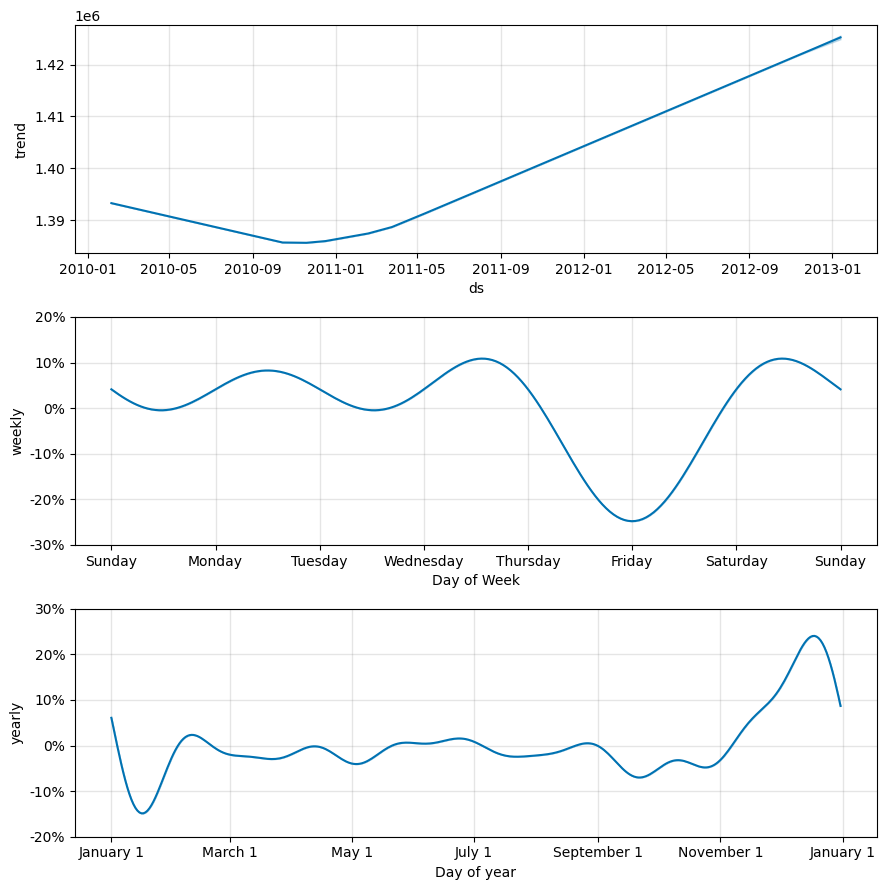

In [24]:
import matplotlib.pyplot as plt

# Plot the forecast
fig1 = model.plot(forecast)
plt.title('Sales Forecast for Next Quarter')
plt.show()

# Plot forecast components (Trend, Weekly, Yearly)
fig2 = model.plot_components(forecast)
plt.show()

#### Sales Forecast Analysis Summary
This analysis uses Prophet to forecast sales for the next quarter, based on historical transaction data from 2010 to 2012. The results provide insights into sales trends, weekly and yearly seasonality.

#### 🔮 1. Sales Forecast for Next Quarter (Top Plot)
1. Black Dots: These are your historical actual sales data points.
2. Blue Line: This is the forecast generated by the Prophet model.
3. Shaded Area (Confidence Interval): Represents uncertainty in the forecast. Wider areas mean less confidence.

#### 🔍 Insights:
1. There's a noticeable upward trend predicted for the next quarter.
2. Your sales forecast shows an increase in the predicted values with rising uncertainty (wider intervals) at the far right end.
3. A few strong seasonality patterns can be visually observed in the historical data.

#### 📈 2. Trend Component (Second Plot)
1. The trend was relatively flat or slightly declining until early 2012.
2. From early 2012 onwards, there's a steady upward trend, suggesting recovery or growth in business performance leading to the forecasted increase in 2013.

#### 📅 3. Weekly Seasonality (Third Plot)
1. Sales tend to be highest on weekends (Saturday and Sunday).
2. Wednesday and Thursday show lower average sales.
3. Implication: Consider optimizing promotions or operations around high-sales days (weekends).

#### 📆 4. Yearly Seasonality (Fourth Plot)
1. Sales show a significant peak toward the end of the year (November–December), likely due to holiday or year-end spending.
2. There is also some smaller bump around May–July, suggesting a mid-year seasonality effect.
3. The early part of the year (January–March) has relatively stable but lower sales.

#### 🧠 Summary and Recommendations
1. Sales Spike Expected: Prepare for increased demand in the upcoming quarter. Inventory, marketing, and operations should align accordingly.
2. Strong Weekly Patterns: Leverage weekend peaks for targeted campaigns and staffing.
3. Year-End Surge: Plan major sales or product launches around November–December.
4. Growth Recovery Trend: If this is a real business case, 2012 likely had new initiatives or market expansion—consider reviewing those drivers.

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Extract actual and predicted values
actual = forecast_data['y'].tail(12).values
predicted = forecast['yhat'].iloc[-24:-12].values

# Calculate MAE and RMSE
mae = mean_absolute_error(actual, predicted)
rmse = np.sqrt(mean_squared_error(actual, predicted))

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

MAE: 466530.5577636648
RMSE: 549125.1904544727


#### Model Evaluation
To assess the performance and reliability of the sales forecast model, we used two standard error metrics: Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE). These metrics compare the predicted sales values to the actual observed sales from the most recent 12 periods.

#### 📈 Evaluation Metrics:
Mean Absolute Error (MAE):
₹466,531
This represents the average absolute difference between predicted and actual sales. On average, the forecasted values deviate from the actual values by approximately ₹466.5K.

Root Mean Squared Error (RMSE):
₹549,125
RMSE gives more weight to larger errors. This indicates that the standard deviation of the prediction errors is around ₹549.1K.

#### 🧠 Interpretation:
Given that the overall sales values range in millions (as seen in the forecast plot), the error margins are within an acceptable range.

The model is able to capture the overall trend and seasonal patterns effectively, though some short-term fluctuations may not be perfectly predicted.

The forecast can be considered suitable for strategic planning, but for highly accurate operational decisions, further model tuning or the addition of external variables (e.g., holidays, promotions) might improve performance.

<h1><center>Thank You</center></h1>